# Lab | Customer Analysis Round 5

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.


### 1. Get the data

We are using the `marketing_customer_analysis.csv` file.


In [169]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore') 

In [170]:
# import csv 
data = pd.read_csv("marketing_customer_analysis.csv")


### 2. Dealing with the data

Already done in the round 2.



In [171]:
# standardise column names
data.columns = data.columns.str.lower().str.replace(' ','_')

In [172]:
# checl for null values
data.isnull().sum()

# no null values to delete

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

### 3. Explore the data

Some datasets have values that are missing, invalid, or otherwise difficult for an algorithm to process. If data is missing, the algorithm can’t use it. If data is invalid, the algorithm produces less accurate or even misleading outcomes. Some datasets are relatively clean but need to be shaped (e.g., aggregated or pivoted) and many datasets are just lacking useful business context (e.g., poorly defined ID values), hence the need for feature enrichment. Good data preparation produces clean and well-curated data which leads to more practical, accurate model outcomes.


   **3.1.- Determine the problems**
    
   **3.2.- Data cleaning** Cleaning the data is very important as the model learning from that data only, so if we feed inconsistent, appropriate data to model it will return garbage only, so it is required to make sure that the data does not contains any unseen problem.
     
       - Feature and Target Variables
       - Data Types
       - Missing data, check null values
       - Outliers
       - Duplicate data
        
   **3.3.- Feature selection** (Which variables are important to answer our questions?)
    
   **3.4.- Data transformation**

In [173]:
# first i would split the data into 2 new dfs (numerical & cateogircal) like in lab 4
numerical = data.select_dtypes(include=np.number)
numerical


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [174]:
# create categorical df
categoricals = data.select_dtypes(include=np.object)
categoricals.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [175]:
# then lets look at the numerical data
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [176]:
# income has a lot of rows with income = 0 - makes sense to replace them with the mean i think
income_mean = numerical['income'].mean()
income_mean

37657.38000875848

In [177]:
numerical['income'] = numerical['income'].replace([0],income_mean)


In [178]:
numerical["income"].describe()

count     9134.000000
mean     47209.837802
std      21723.702506
min      10037.000000
25%      34337.000000
50%      37657.380009
75%      62320.000000
max      99981.000000
Name: income, dtype: float64

In [179]:
# create regression model with target variable (we used total_claim_amount last time so i'll do the same here)
# then check after for outliers, normality etc and transform/clean data to try and improve model
import statsmodels.api as sm

In [180]:
X = numerical.drop(['total_claim_amount',], axis=1)
y = numerical['total_claim_amount']


X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

print(model.summary())
# not a great model - r-squared: 0.45

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     1095.
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:04:51   Log-Likelihood:                -61980.
No. Observations:                9134   AIC:                         1.240e+05
Df Residuals:                    9126   BIC:                         1.240e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [181]:
# check for correlations so we can immediately remove columns with high correlation 
numerical_corr = numerical.corr()
numerical_corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.010481,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.010481,1.000000,-0.013668,-0.030930,0.009532,0.012584,-0.003896,-0.246283
monthly_premium_auto,0.396262,-0.013668,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.030930,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,0.009532,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.012584,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.003896,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.246283,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


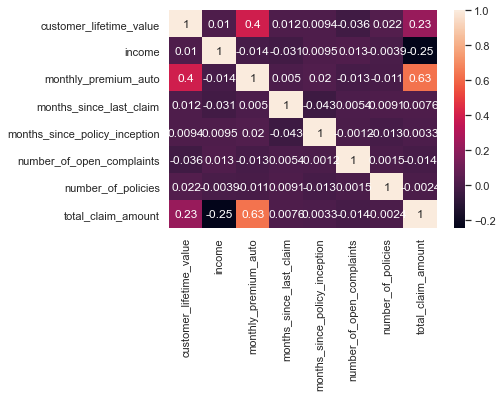

In [182]:
# heatmap of correlations
sns_plot = sns.heatmap(numerical_corr, annot=True)
figure = sns_plot.get_figure()    
figure.savefig('svm_conf.png', dpi=400)
plt.show()
# doesn't show any high correlations so I wouldn't delete any columns

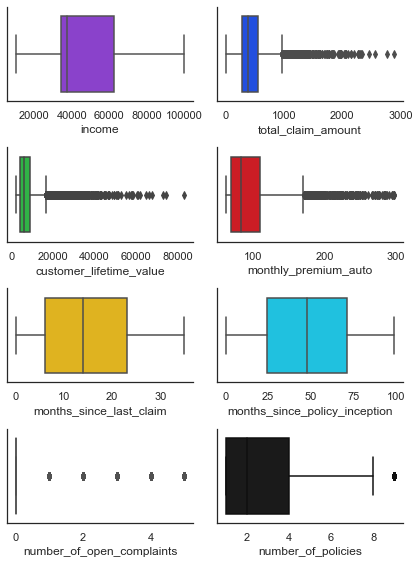

In [183]:
# check the columns next for outliers using boxplots
# i tried to use the mini plots here to get all the columns in 1 field below with diff colours - is this the correct way of doing it?

sns.set(style="white", palette="bright", color_codes=True)

f, axes = plt.subplots(4, 2, figsize=(6, 8), sharex=False)
sns.despine(left=False)


sns.boxplot(numerical['income'], color="m", ax=axes[0, 0])

sns.boxplot(numerical["total_claim_amount"], color="b", ax=axes[0, 1])

sns.boxplot(numerical["customer_lifetime_value"], color="g", ax=axes[1, 0])

sns.boxplot(numerical["monthly_premium_auto"], color="r", ax=axes[1, 1])

sns.boxplot(numerical["months_since_last_claim"], color="y", ax=axes[2,0])

sns.boxplot(numerical["months_since_policy_inception"],  color="c", ax=axes[2,1])

sns.boxplot(numerical["number_of_open_complaints"], color="m", ax=axes[3,0])

sns.boxplot(numerical["number_of_policies"], color="k", ax=axes[3,1])

plt.tight_layout()


In [184]:
# what should we do about number of open complaints column? - most of the values are 0 that's why the boxplot looks weird
# if we remove the 0s then we're potentially deleting lots of other important information from the other columns

In [185]:
# customer lifetime value and monthly premium have a lot of outliers on the higher end so i would remove them
# by finding the iqr and capping the upper and lower limits. for total claim I would leave it because it's the target column - is this the correct approach?

In [186]:
# remove outliers for customer lifetime value
customer_lifetime_value_iqr = np.percentile(numerical['customer_lifetime_value'],75) - np.percentile(numerical['customer_lifetime_value'],25)

In [187]:
upper_limit = np.percentile(numerical['customer_lifetime_value'],75) + 1.5*total_claim_iqr
lower_limit = np.percentile(numerical['customer_lifetime_value'],25) - 1.5*total_claim_iqr
upper_limit, lower_limit

(9375.051932625001, 3581.366902875)

In [188]:
numerical.loc[numerical["customer_lifetime_value"] > upper_limit, "customer_lifetime_value"] = upper_limit
numerical.loc[numerical["customer_lifetime_value"] < lower_limit, "customer_lifetime_value"] = lower_limit

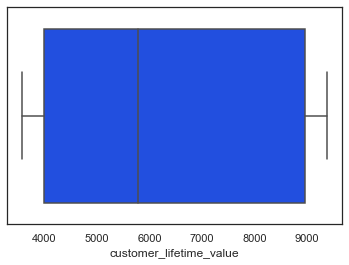

In [189]:
sns.boxplot(x=numerical['customer_lifetime_value']) 
plt.show()
# boxplot looks better after removing outliers

In [190]:
# remove outliers for monthly premium auto
monthly_premium_auto_iqr = np.percentile(numerical['monthly_premium_auto'],75) - np.percentile(numerical['monthly_premium_auto'],25)

In [191]:
upper_limit = np.percentile(numerical['monthly_premium_auto'],75) + 3*monthly_premium_auto_iqr
lower_limit = np.percentile(numerical['monthly_premium_auto'],25) - 3*monthly_premium_auto_iqr
upper_limit, lower_limit

(232.0, -55.0)

In [192]:
numerical = numerical[(data['monthly_premium_auto']>lower_limit) & (numerical['monthly_premium_auto']<upper_limit)]

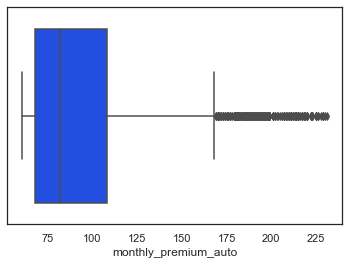

In [193]:
sns.boxplot(x=numerical['monthly_premium_auto']) 
plt.show()
#boxplot looks better but still a fair amount of outliers. what should we do?

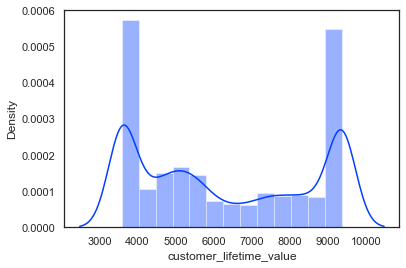

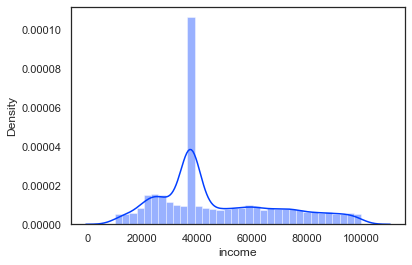

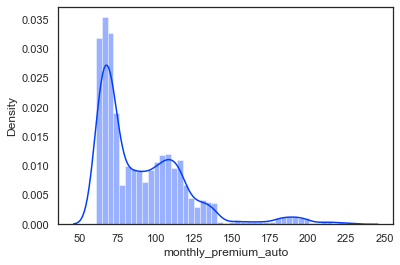

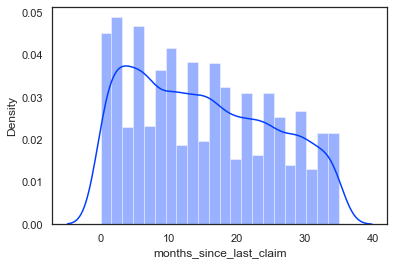

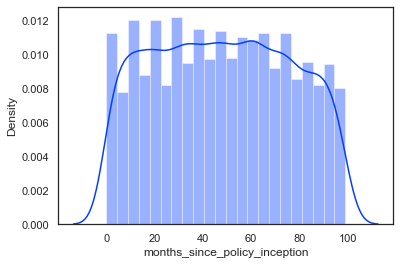

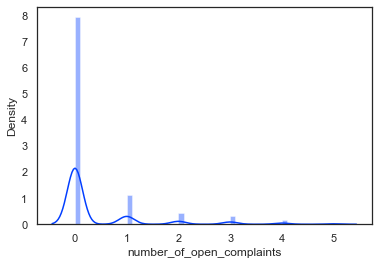

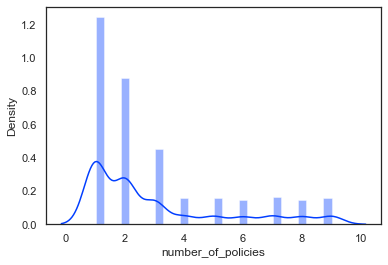

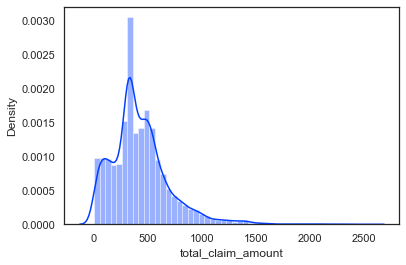

In [194]:
# now check distribution of variables
for column in numerical.columns:
    sns.distplot(numerical[column])
    plt.show()

### 4. Processing Data

(_Further processing..._)

- X-y split.
- Normalize (numerical).

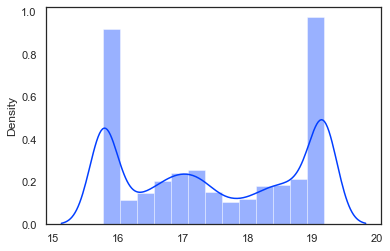

In [195]:
# no normal distributions so first try and make data more normal with box cox

numerical1 = numerical.copy()

numerical1['customer_lifetime_value'] = np.where(numerical1['customer_lifetime_value']<=0, np.NAN, numerical1['customer_lifetime_value'])

numerical1['customer_lifetime_value'] = numerical1['customer_lifetime_value'].fillna(numerical1['customer_lifetime_value'].mean())

transformed_data, _ci = stats.boxcox(numerical1['customer_lifetime_value'])

sns.distplot(transformed_data)
plt.show()

# customer lifetime value still not normal (see below) - is it even possible to normalise this column?


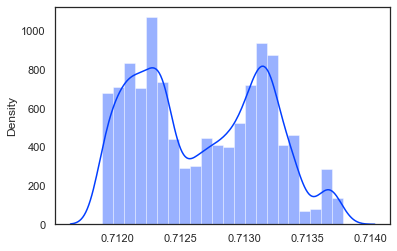

In [196]:
# try to normalise monthly premium auto with box cox
numerical1['monthly_premium_auto'] = np.where(numerical1['monthly_premium_auto']<=0, np.NAN, numerical1['monthly_premium_auto'])

numerical1['monthly_premium_auto'] = numerical1['monthly_premium_auto'].fillna(numerical1['monthly_premium_auto'].mean())

transformed_data, _ci = stats.boxcox(numerical1['monthly_premium_auto'])

sns.distplot(transformed_data)
plt.show()

# more normal now but still not great

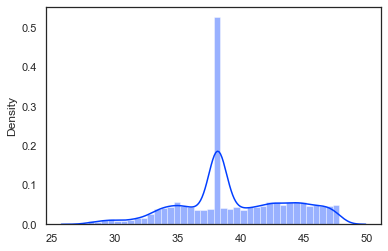

In [197]:
numerical1['income'] = np.where(numerical1['income']<=0, np.NAN, numerical1['income'])

numerical1['income'] = numerical1['income'].fillna(numerical1['income'].mean())

transformed_data, _ci = stats.boxcox(numerical1['income'])

sns.distplot(transformed_data)
plt.show()

#slightly more normal


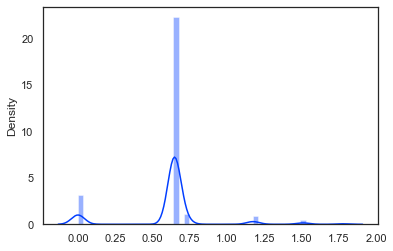

In [198]:

numerical1['number_of_open_complaints'] = np.where(numerical1['number_of_open_complaints']<=0, np.NAN, numerical1['number_of_open_complaints'])

numerical1['number_of_open_complaints'] = numerical1['number_of_open_complaints'].fillna(numerical1['number_of_open_complaints'].mean())

transformed_data, _ci = stats.boxcox(numerical1['number_of_open_complaints'])

sns.distplot(transformed_data)
plt.show()

# again a bit more normal but not great

In [ ]:
# box cox doesn't seem to work that well on my data - am i doing something wrong?

In [213]:
# make new regression model to see if changes had an effect
X = numerical1.drop(['total_claim_amount',], axis=1)
y = numerical1['total_claim_amount']


X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

print(model.summary())

# R-squared value has gone from 0.457 to 0.409 so actually the newer model is worse.
# the p-values improved for almost all of the columns
# is that normal?

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     892.4
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:26:59   Log-Likelihood:                -61195.
No. Observations:                9047   AIC:                         1.224e+05
Df Residuals:                    9039   BIC:                         1.225e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [200]:
# normalise all the data - (chooses normalisation instead of standardaisation because it should work better with non-normally distributed data like mine)

y = numerical1['total_claim_amount']
X = numerical1.drop(['total_claim_amount'], axis=1)


In [204]:
import pickle

transformer = Normalizer()
transformer.fit(X)

with open('transformer.pkl', 'wb') as file:
    pickle.dump(transformer, file)

with open('transformer.pkl', 'rb') as file:
    transformer = pickle.load(file)

x_normalized = transformer.transform(X)

In [211]:
normalised_data = pd.DataFrame(x_normalized)

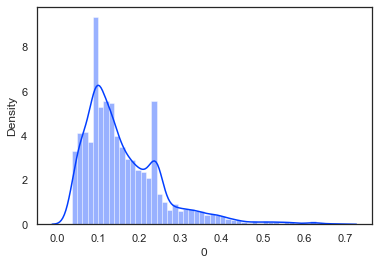

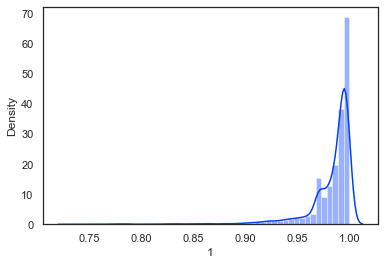

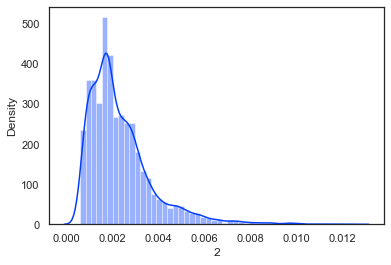

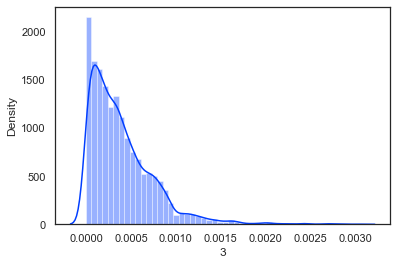

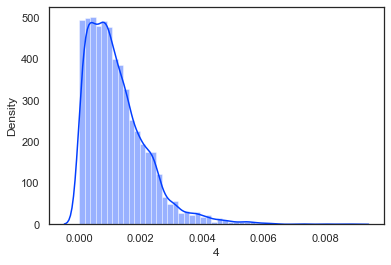

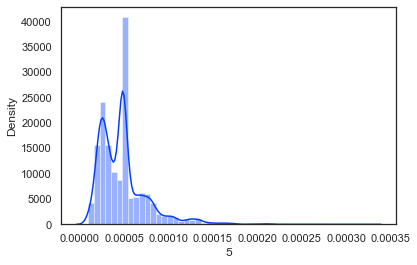

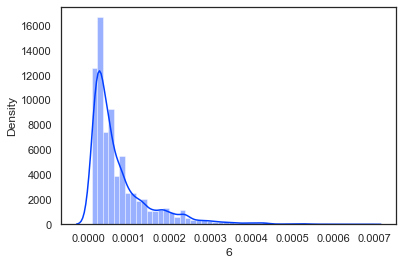

In [212]:
for column in normalised_data.columns:
    sns.distplot(normalised_data[column])
    plt.show()

In [ ]:
# data still doesn't look normalised - is this supposed to just scale it down? or should it look more normally distributed on the plots too?